<a href="https://colab.research.google.com/github/arjungupta-15/Airbnb/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 2: Upload images from your system
from google.colab import files

# Upload images from your local system
uploaded = files.upload()  # Ye dialog box open karega jaha se aap images select kar sakte ho


Saving h98.jpg to h98 (1).jpg


In [2]:
# Step 3: Save uploaded images into a folder
import os

# Create a folder to save images
os.makedirs('uploaded_images', exist_ok=True)

# Save uploaded images in the created folder
for filename in uploaded.keys():
    with open(os.path.join('uploaded_images', filename), 'wb') as f:
        f.write(uploaded[filename])

print("Images saved to 'uploaded_images' folder.")


Images saved to 'uploaded_images' folder.


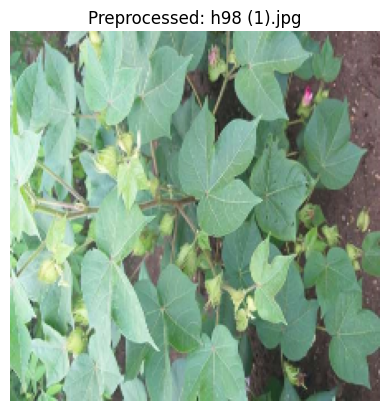

In [3]:
# Step 4: Preprocess images using OpenCV and Matplotlib
import cv2
import matplotlib.pyplot as plt

# Set the target size for resizing images
IMG_SIZE = (224, 224)

# Folder containing uploaded images
img_dir = 'uploaded_images'

# Loop through each image in the folder and preprocess
for img_file in os.listdir(img_dir):
    img_path = os.path.join(img_dir, img_file)  # Full path of each image

    # Read the image using OpenCV
    image = cv2.imread(img_path)

    # Convert image from BGR to RGB (OpenCV reads in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 pixels
    image = cv2.resize(image, IMG_SIZE)

    # Normalize the image (scale pixel values to [0, 1] range)
    image = image / 255.0

    # Display the preprocessed image
    plt.imshow(image)
    plt.title(f"Preprocessed: {img_file}")
    plt.axis('off')
    plt.show()


In [4]:
from google.colab import files

# Upload images from your local system
uploaded = files.upload()

Saving h5.png to h5.png


In [5]:
# Step 3: Save uploaded images into a folder
import os

# Create a folder to save images
os.makedirs('uploaded_images', exist_ok=True)

# Save uploaded images in the created folder
for filename in uploaded.keys():
    with open(os.path.join('uploaded_images', filename), 'wb') as f:
        f.write(uploaded[filename])

print("Images saved to 'uploaded_images' folder.")

Images saved to 'uploaded_images' folder.


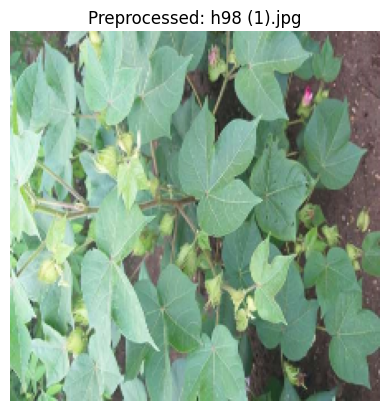

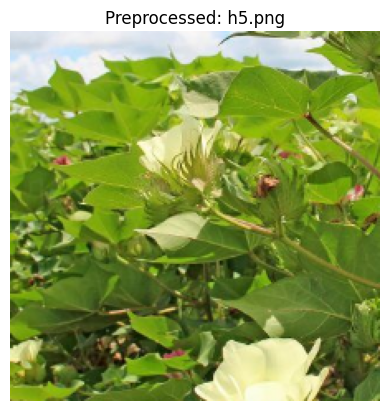

In [6]:
# Step 4: Preprocess images using OpenCV and Matplotlib
import cv2
import matplotlib.pyplot as plt

# Set the target size for resizing images
IMG_SIZE = (224, 224)

# Folder containing uploaded images
img_dir = 'uploaded_images'

# Loop through each image in the folder and preprocess
for img_file in os.listdir(img_dir):
    img_path = os.path.join(img_dir, img_file)  # Full path of each image

    # Read the image using OpenCV
    image = cv2.imread(img_path)

    # Convert image from BGR to RGB (OpenCV reads in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 pixels
    image = cv2.resize(image, IMG_SIZE)

    # Normalize the image (scale pixel values to [0, 1] range)
    image = image / 255.0

    # Display the preprocessed image
    plt.imshow(image)
    plt.title(f"Preprocessed: {img_file}")
    plt.axis('off')
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define the paths
input_dir = 'uploaded_images'  # Folder where images are saved
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for split datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split ratios
train_ratio = 0.7  # 70% data for training
val_ratio = 0.2    # 20% data for validation
test_ratio = 0.1   # 10% data for testing

# List all files in the input directory
all_files = os.listdir(input_dir)

# Split data into train, validation, and test sets
train_files, temp_files = train_test_split(all_files, test_size=(1 - train_ratio))
val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)))

# Helper function to copy files to destination folder
def copy_files(files, source_dir, dest_dir):
    for file_name in files:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Copy the files to respective directories
copy_files(train_files, input_dir, train_dir)
copy_files(val_files, input_dir, val_dir)
copy_files(test_files, input_dir, test_dir)

print("Dataset split successfully!")


ValueError: With n_samples=1, test_size=0.3333333333333333 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [8]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define the paths
input_dir = 'uploaded_images'  # Folder where images are saved
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for split datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split ratios
train_ratio = 0.7  # 70% data for training
val_ratio = 0.2    # 20% data for validation
test_ratio = 0.1   # 10% data for testing

# List all files in the input directory
all_files = os.listdir(input_dir)

# Check if enough files are present
if len(all_files) < 3:
    print("Not enough files to split into train, validation, and test sets.")
    # Handle small dataset: Assign all files to training if too few
    train_files, val_files, test_files = all_files, [], []
else:
    # Split data into train and temporary sets
    train_files, temp_files = train_test_split(all_files, test_size=(1 - train_ratio))

    # Further split temp set into validation and test sets
    if len(temp_files) < 2:  # Handling cases with too few temp files
        val_files, test_files = temp_files, []  # Assign all temp files to validation
    else:
        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)))

# Helper function to copy files to destination folder
def copy_files(files, source_dir, dest_dir):
    for file_name in files:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Copy the files to respective directories
copy_files(train_files, input_dir, train_dir)
copy_files(val_files, input_dir, val_dir)
copy_files(test_files, input_dir, test_dir)

print("Dataset split successfully!")


Not enough files to split into train, validation, and test sets.
Dataset split successfully!


In [9]:
# List all files in the input directory
all_files = os.listdir(input_dir)

# Check the number of files
print(f"Total files in input directory: {len(all_files)}")  # This will show how many files are present

# Check if enough files are present
if len(all_files) < 3:
    print("Not enough files to split into train, validation, and test sets.")
    # Handle small dataset: Assign all files to training if too few
    train_files, val_files, test_files = all_files, [], []
else:
    # Split data into train and temporary sets
    train_files, temp_files = train_test_split(all_files, test_size=(1 - train_ratio))

    # Further split temp set into validation and test sets
    if len(temp_files) < 2:  # Handling cases with too few temp files
        val_files, test_files = temp_files, []  # Assign all temp files to validation
    else:
        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)))

# Helper function to copy files to destination folder
def copy_files(files, source_dir, dest_dir):
    for file_name in files:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Copy the files to respective directories
copy_files(train_files, input_dir, train_dir)
copy_files(val_files, input_dir, val_dir)
copy_files(test_files, input_dir, test_dir)

print("Dataset split successfully!")


Total files in input directory: 2
Not enough files to split into train, validation, and test sets.
Dataset split successfully!


In [10]:
# Step 2: Upload images from your system
from google.colab import files

# Upload images from your local system
uploaded = files.upload()

Saving h99.jpg to h99.jpg
Saving images (4).jpg to images (4).jpg
Saving h8.png to h8.png
Saving h9.jpg to h9.jpg
Saving h49.jpg to h49.jpg
Saving h50.jpg to h50.jpg
Saving h51.jpg to h51.jpg
Saving h52.jpg to h52.jpg


In [11]:
# Step 3: Save uploaded images into a folder
import os

# Create a folder to save images
os.makedirs('uploaded_images', exist_ok=True)

# Save uploaded images in the created folder
for filename in uploaded.keys():
    with open(os.path.join('uploaded_images', filename), 'wb') as f:
        f.write(uploaded[filename])

print("Images saved to 'uploaded_images' folder.")

Images saved to 'uploaded_images' folder.


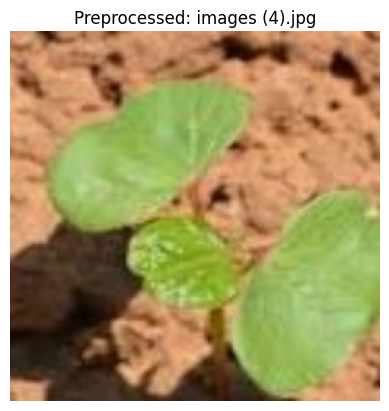

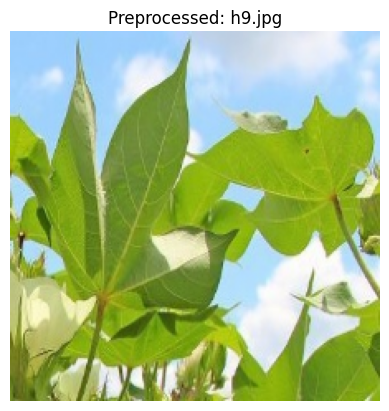

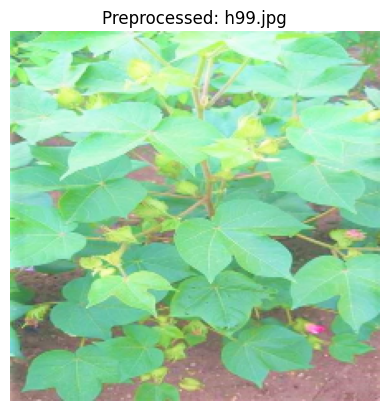

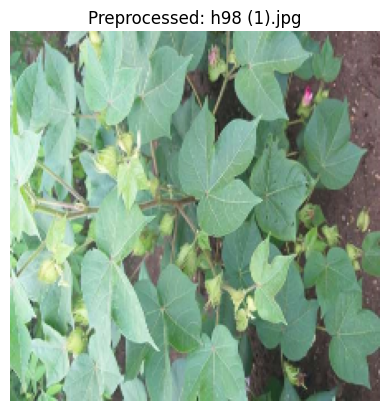

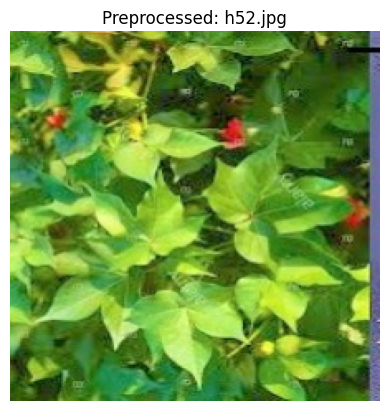

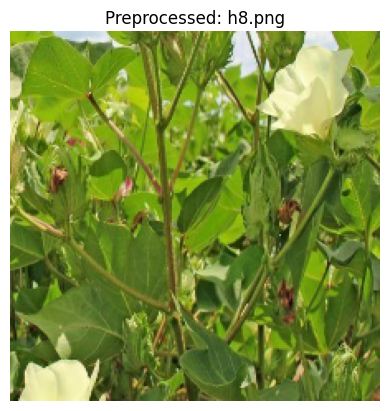

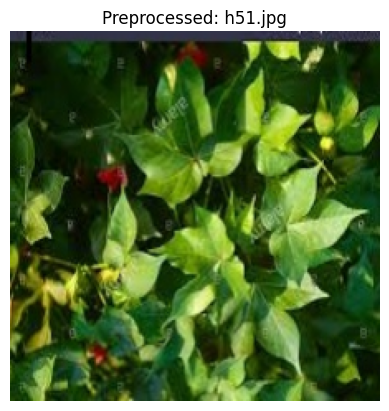

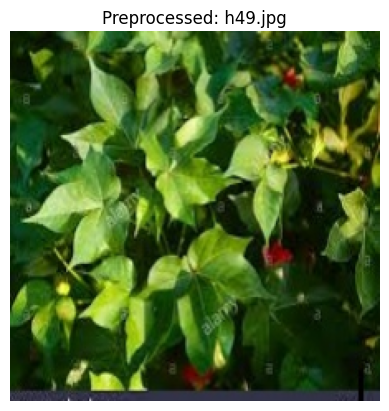

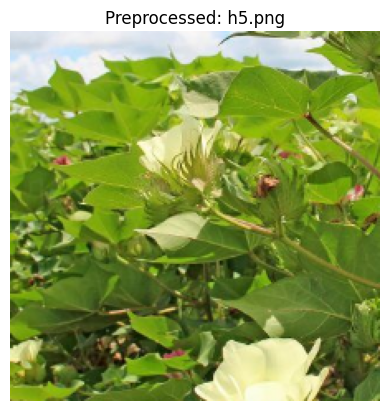

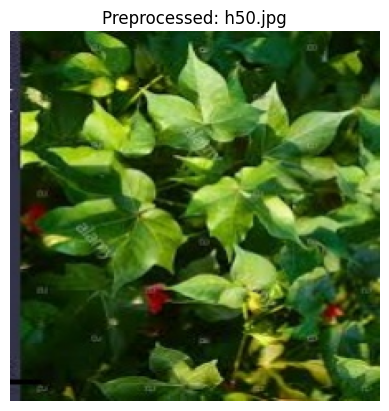

In [12]:
# Step 4: Preprocess images using OpenCV and Matplotlib
import cv2
import matplotlib.pyplot as plt

# Set the target size for resizing images
IMG_SIZE = (224, 224)

# Folder containing uploaded images
img_dir = 'uploaded_images'

# Loop through each image in the folder and preprocess
for img_file in os.listdir(img_dir):
    img_path = os.path.join(img_dir, img_file)  # Full path of each image

    # Read the image using OpenCV
    image = cv2.imread(img_path)

    # Convert image from BGR to RGB (OpenCV reads in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 pixels
    image = cv2.resize(image, IMG_SIZE)

    # Normalize the image (scale pixel values to [0, 1] range)
    image = image / 255.0

    # Display the preprocessed image
    plt.imshow(image)
    plt.title(f"Preprocessed: {img_file}")
    plt.axis('off')
    plt.show()


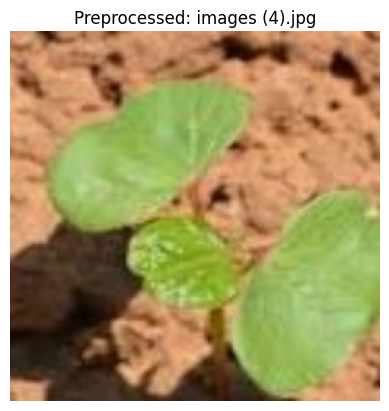

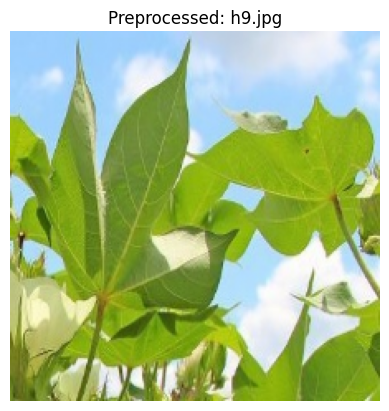

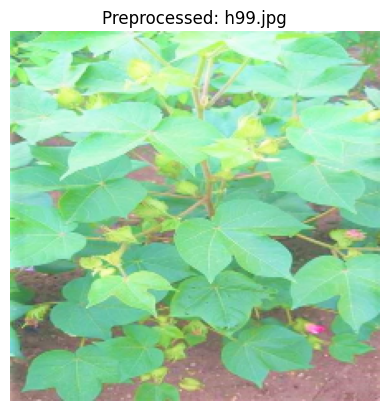

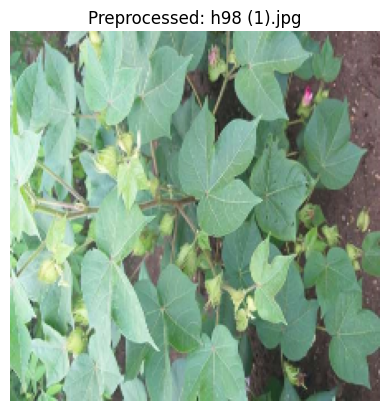

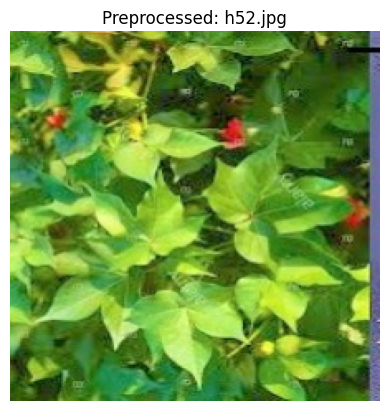

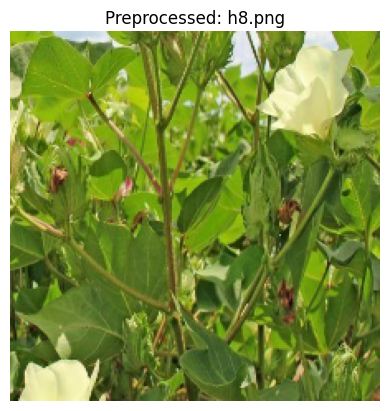

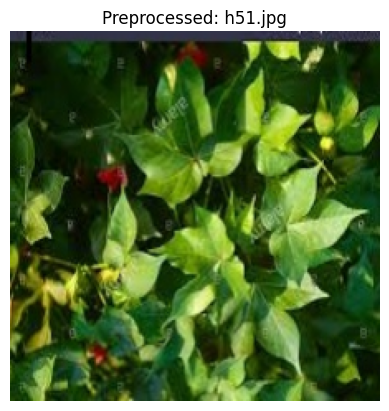

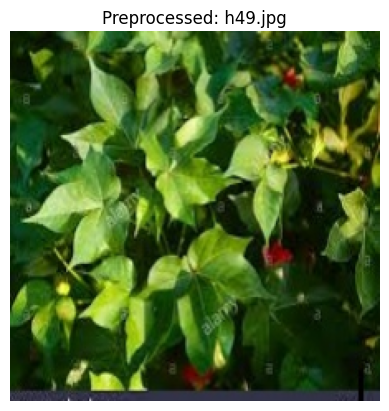

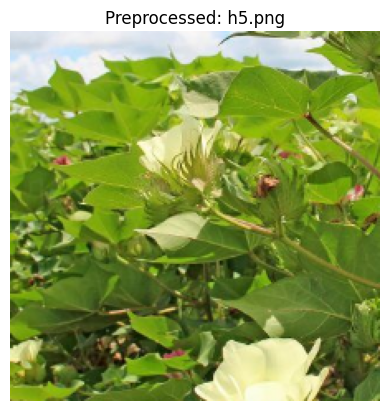

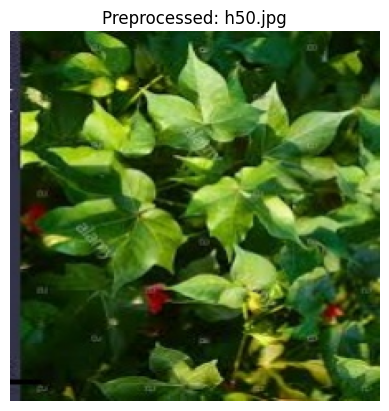

In [13]:
# Step 4: Preprocess images using OpenCV and Matplotlib
import cv2
import matplotlib.pyplot as plt

# Set the target size for resizing images
IMG_SIZE = (224, 224)

# Folder containing uploaded images
img_dir = 'uploaded_images'

# Loop through each image in the folder and preprocess
for img_file in os.listdir(img_dir):
    img_path = os.path.join(img_dir, img_file)  # Full path of each image

    # Read the image using OpenCV
    image = cv2.imread(img_path)

    # Convert image from BGR to RGB (OpenCV reads in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 pixels
    image = cv2.resize(image, IMG_SIZE)

    # Normalize the image (scale pixel values to [0, 1] range)
    image = image / 255.0

    # Display the preprocessed image
    plt.imshow(image)
    plt.title(f"Preprocessed: {img_file}")
    plt.axis('off')
    plt.show()


In [14]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define the paths
input_dir = 'uploaded_images'  # Folder where images are saved
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for split datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split ratios
train_ratio = 0.7  # 70% data for training
val_ratio = 0.2    # 20% data for validation
test_ratio = 0.1   # 10% data for testing

# List all files in the input directory
all_files = os.listdir(input_dir)

# Check if enough files are present
if len(all_files) < 3:
    print("Not enough files to split into train, validation, and test sets.")
    # Handle small dataset: Assign all files to training if too few
    train_files, val_files, test_files = all_files, [], []
else:
    # Split data into train and temporary sets
    train_files, temp_files = train_test_split(all_files, test_size=(1 - train_ratio))

    # Further split temp set into validation and test sets
    if len(temp_files) < 2:  # Handling cases with too few temp files
        val_files, test_files = temp_files, []  # Assign all temp files to validation
    else:
        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)))

# Helper function to copy files to destination folder
def copy_files(files, source_dir, dest_dir):
    for file_name in files:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Copy the files to respective directories
copy_files(train_files, input_dir, train_dir)
copy_files(val_files, input_dir, val_dir)
copy_files(test_files, input_dir, test_dir)

print("Dataset split successfully!")


Dataset split successfully!


In [15]:
# Install required libraries
!pip install tensorflow keras


In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Step 2.2: Load Pre-trained Models (ResNet-50 and VGG19)
# ResNet-50 Model Setup
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# VGG19 Model Setup
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers to keep pretrained weights intact
resnet_base.trainable = False
vgg19_base.trainable = False

# Function to add a custom classifier head to any base model
def add_custom_head(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Flatten the features
    x = Dense(1024, activation='relu')(x)  # Add a dense layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Final output layer
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Number of classes (change this according to your dataset)
num_classes = 3  # Example: 3 classes

# Add custom head to both models
resnet_model = add_custom_head(resnet_base, num_classes)
vgg19_model = add_custom_head(vgg19_base, num_classes)

# Print model summary
print("ResNet-50 Model Summary:")
resnet_model.summary()

print("\nVGG19 Model Summary:")
vgg19_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
ResNet-50 Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,688,963 (98.00 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


VGG19 Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,552,771 (78.40 MB)

 Trainable params: 528,387 (2.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [18]:
# VGG19 Model
base_model = keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Custom Classifier Head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes
])


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [21]:
# Assume train_data, val_data are already defined
history = model.fit(train_data,
                    epochs=50,
                    validation_data=val_data,
                    callbacks=[early_stopping])

# Print training and validation accuracy and loss
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: Training Accuracy: {history.history['accuracy'][i]:.4f}, Validation Accuracy: {history.history['val_accuracy'][i]:.4f}")


NameError: name 'train_data' is not defined